In [2]:
import pandas as pd

df = pd.read_csv('../Dataset/nasa_power_prepared_data.csv')
df.shape

(16389, 107)

### Analysis

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt

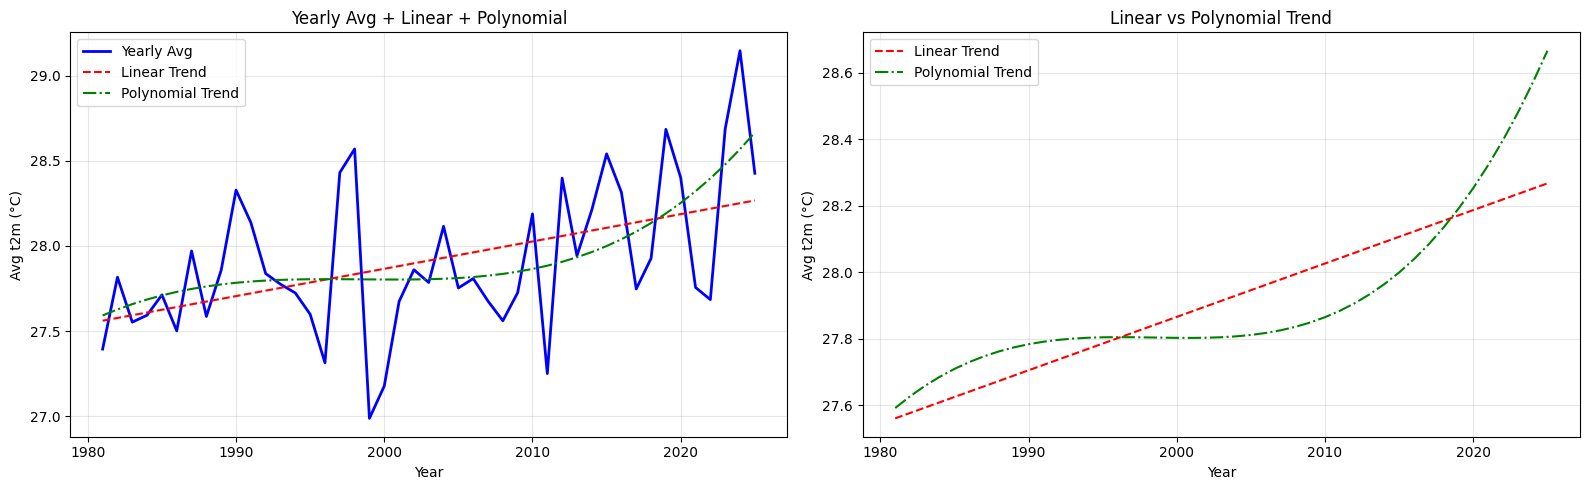

Linear slope: 0.0161 °C/year


In [4]:
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    yearly_avg = df.groupby('year')['t2m'].mean()
    years = yearly_avg.index.values.reshape(-1, 1)
    temps = yearly_avg.values

    # Linear trend
    model = LinearRegression()
    model.fit(years, temps)
    trend_linear = model.predict(years)

    # Non-linear (Polynomial) trend (degree)
    poly = PolynomialFeatures(degree=10)
    years_poly = poly.fit_transform(years)
    model_poly = LinearRegression()
    model_poly.fit(years_poly, temps)
    trend_poly = model_poly.predict(years_poly)

    fig, axs = plt.subplots(1, 2, figsize=(16, 5))
    # Subplot 1: Yearly Avg + Linear + Polynomial
    axs[0].plot(years, temps, color='blue', linewidth=2, label='Yearly Avg')
    axs[0].plot(years, trend_linear, color='red', linestyle='--', label='Linear Trend')
    axs[0].plot(years, trend_poly, color='green', linestyle='-.', label='Polynomial Trend')
    axs[0].set_title('Yearly Avg + Linear + Polynomial')
    axs[0].set_xlabel('Year')
    axs[0].set_ylabel('Avg t2m (°C)')
    axs[0].grid(True, alpha=0.3)
    axs[0].legend()

    # Subplot 2: Linear + Polynomial only
    axs[1].plot(years, trend_linear, color='red', linestyle='--', label='Linear Trend')
    axs[1].plot(years, trend_poly, color='green', linestyle='-.', label='Polynomial Trend')
    axs[1].set_title('Linear vs Polynomial Trend')
    axs[1].set_xlabel('Year')
    axs[1].set_ylabel('Avg t2m (°C)')
    axs[1].grid(True, alpha=0.3)
    axs[1].legend()

    plt.tight_layout()
    plt.show()

    print(f'Linear slope: {model.coef_[0]:.4f} °C/year')

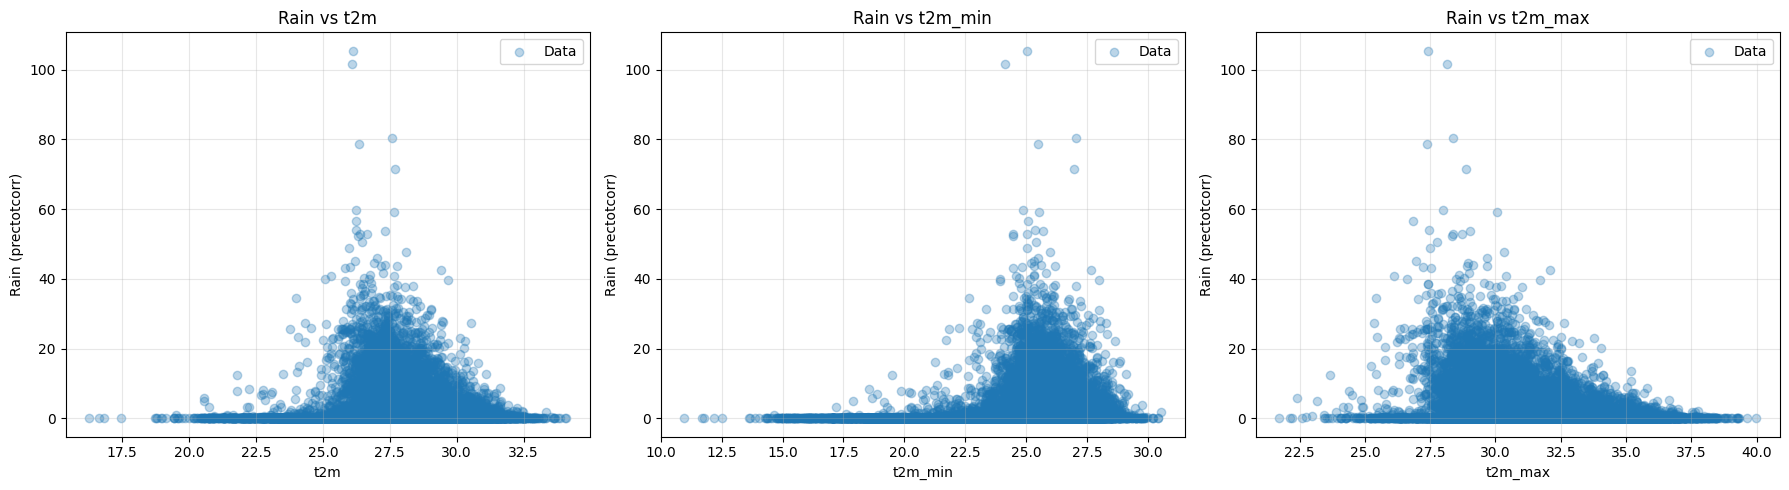

In [5]:
cols = ['t2m', 't2m_min', 't2m_max']
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(cols):
    if col in df.columns and 'prectotcorr' in df.columns:
        X = df[[col]].values.flatten()
        y = df['prectotcorr'].values
        axs[i].scatter(X, y, alpha=0.3, label='Data')
        axs[i].set_xlabel(col)
        axs[i].set_ylabel('Rain (prectotcorr)')
        axs[i].set_title(f'Rain vs {col}')
        axs[i].legend()
        axs[i].grid(True, alpha=0.3)
        
plt.tight_layout()
plt.show()

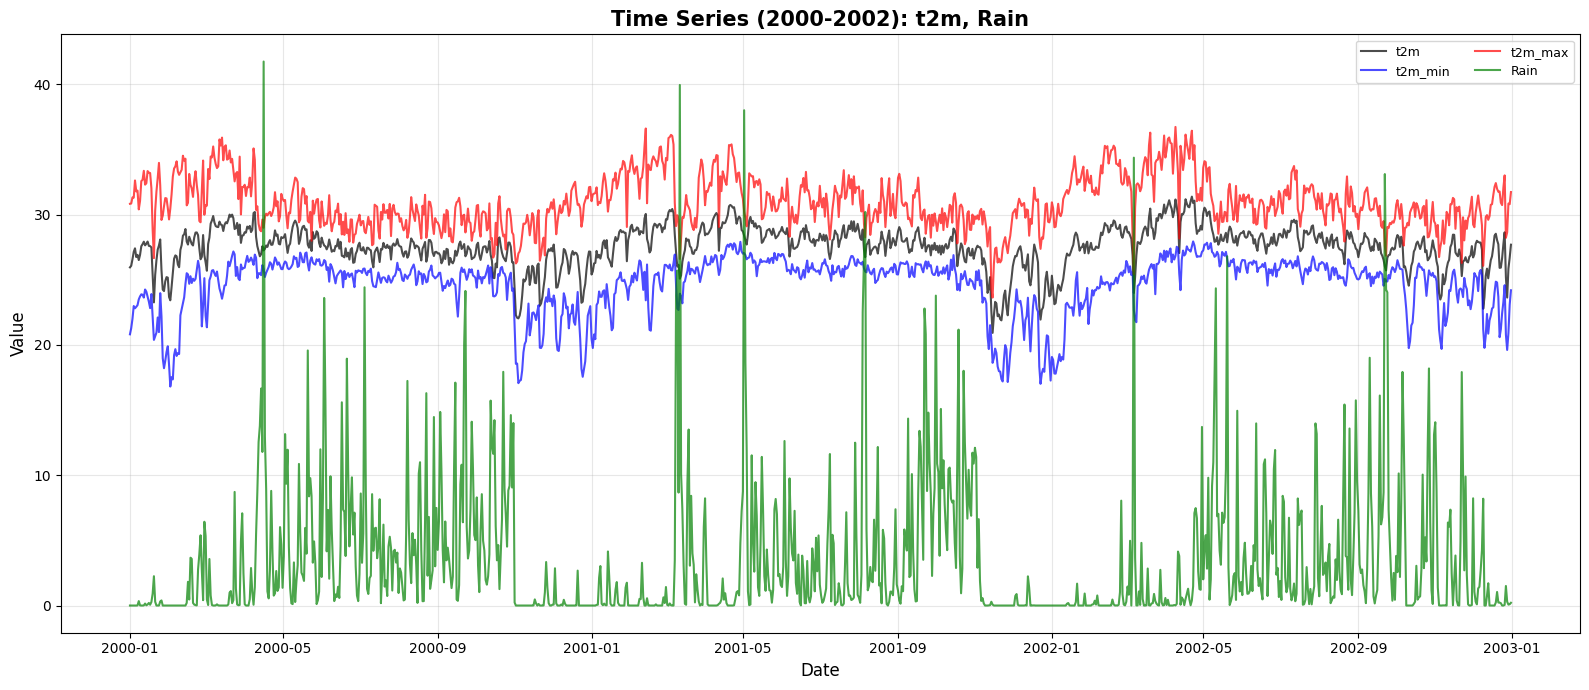

In [ ]:
# select 2000-2002
mask = (df['date'] >= '2000-01-01') & (df['date'] <= '2002-12-31')
df_period = df.loc[mask].copy()

# create numeric index for polynomial fitting
df_period['day_index'] = range(len(df_period))

features = ['t2m', 't2m_min', 't2m_max', 'prectotcorr']
labels = ['t2m', 't2m_min', 't2m_max', 'Rain']
colors = ['black', 'blue', 'red', 'green']
trend_colors = ['gray', 'lightblue', 'pink', 'lightsteelblue']

plt.figure(figsize=(16, 7))
for feat, label, color in zip(features, labels, colors):
    if feat in df_period.columns:
        plt.plot(df_period['date'], df_period[feat], label=label, color=color, linewidth=1.5, alpha=0.7)

plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('Time Series (2000-2002): t2m, Rain', fontsize=15, fontweight='bold')
plt.legend(loc='best', fontsize=9, ncol=2)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

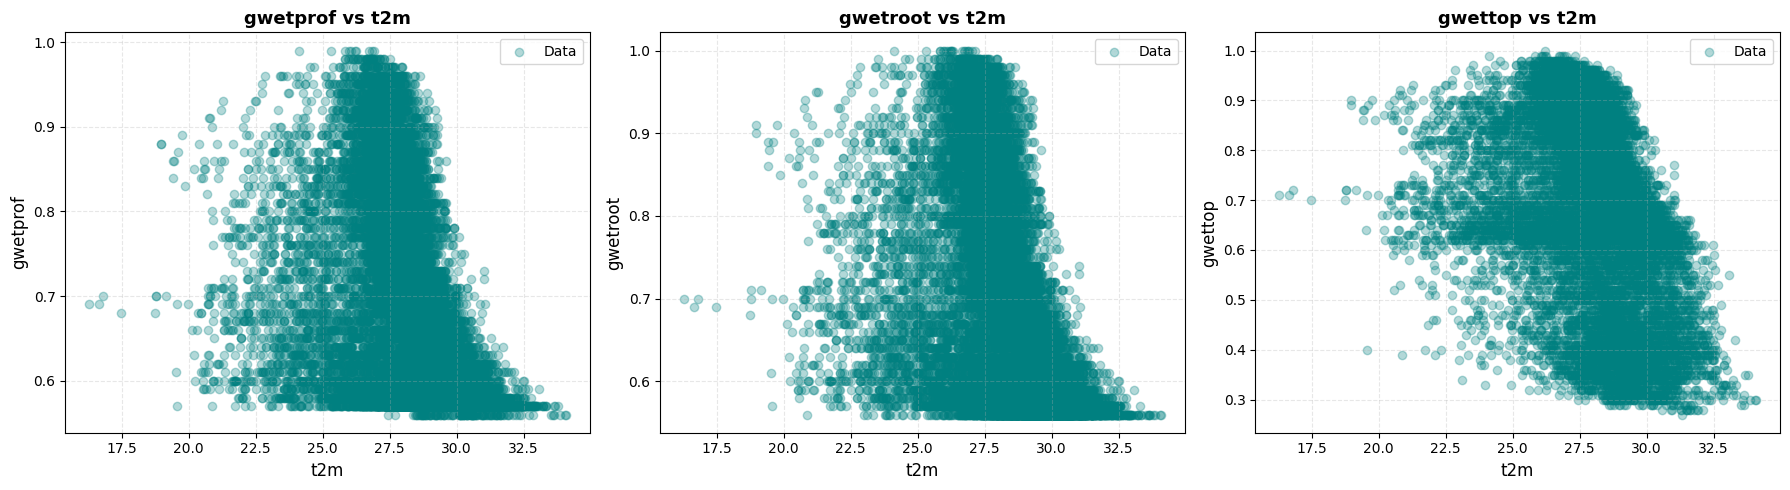

In [7]:
features_to_compare = ['gwetprof', 'gwetroot', 'gwettop']
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(features_to_compare):
    if 't2m' in df.columns and col in df.columns:
        X = df['t2m'].values
        y = df[col].values
        axs[i].scatter(X, y, alpha=0.3, label='Data', color='teal')
        axs[i].set_xlabel('t2m', fontsize=12)
        axs[i].set_ylabel(col, fontsize=12)
        axs[i].set_title(f'{col} vs t2m', fontsize=13, fontweight='bold')
        axs[i].legend()
        axs[i].grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


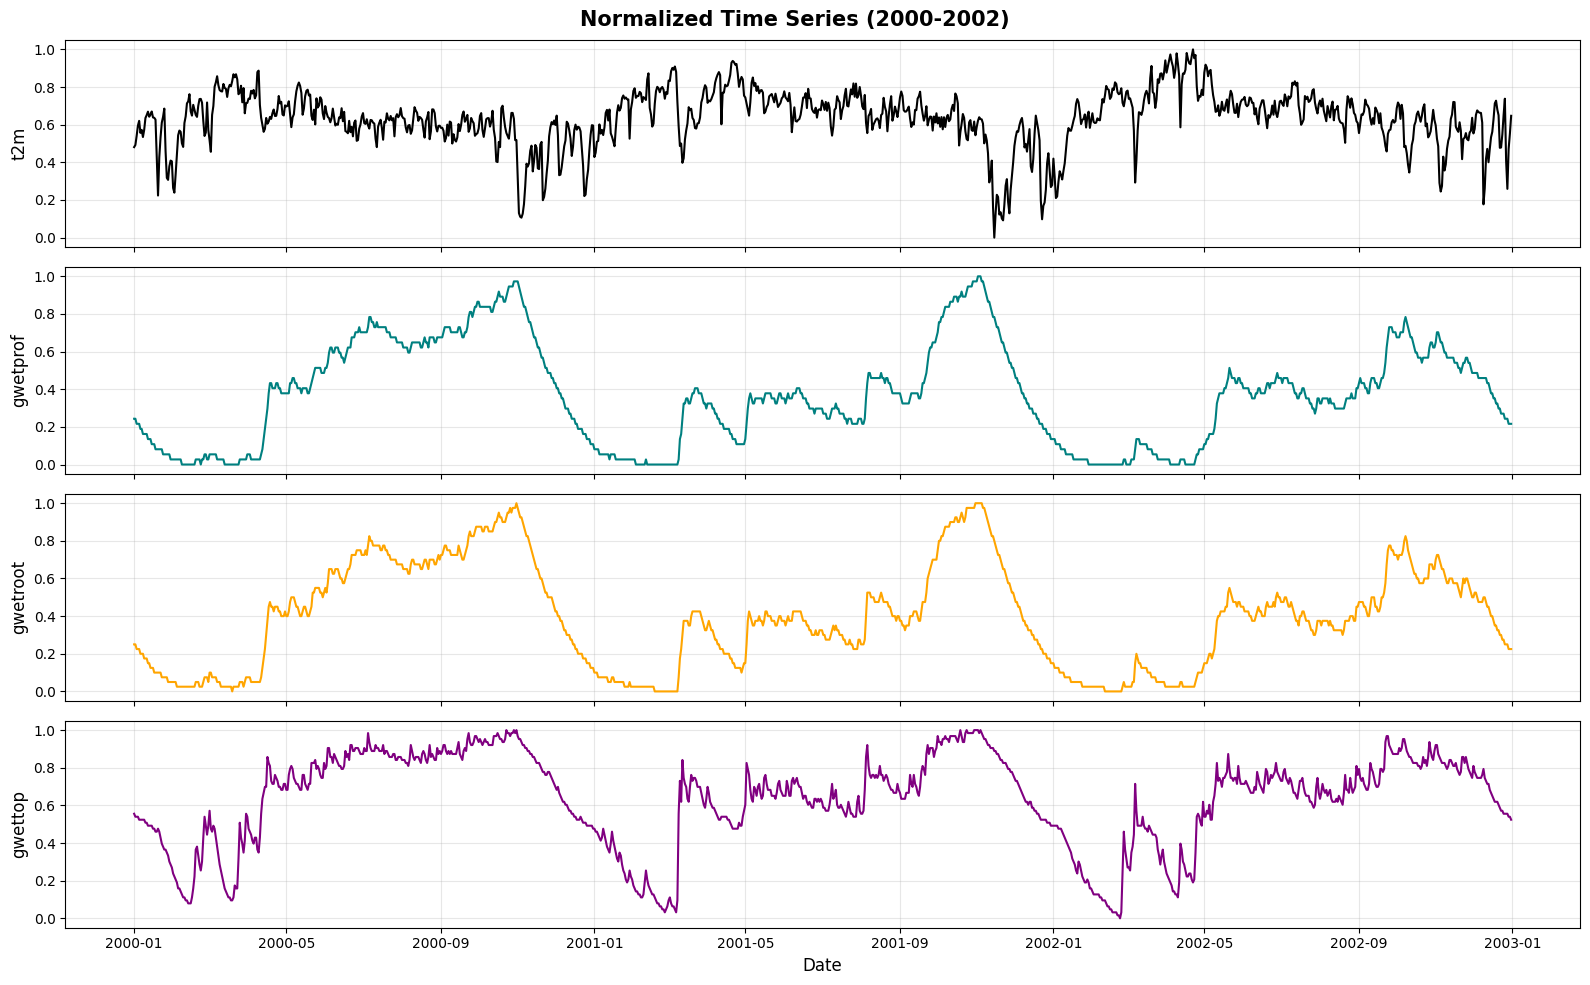

In [8]:
features_to_compare = ['t2m', 'gwetprof', 'gwetroot', 'gwettop']
colors = ['black', 'teal', 'orange', 'purple']
fig, axs = plt.subplots(len(features_to_compare), 1, figsize=(16, 10), sharex=True)
for i, (col, color) in enumerate(zip(features_to_compare, colors)):
    series = df_period[col]
    norm_series = (series - series.min()) / (series.max() - series.min())
    axs[i].plot(df_period['date'], norm_series, color=color, linewidth=1.5)
    axs[i].set_ylabel(col, fontsize=12)
    axs[i].grid(True, alpha=0.3)
axs[-1].set_xlabel('Date', fontsize=12)
plt.suptitle('Normalized Time Series (2000-2002)', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

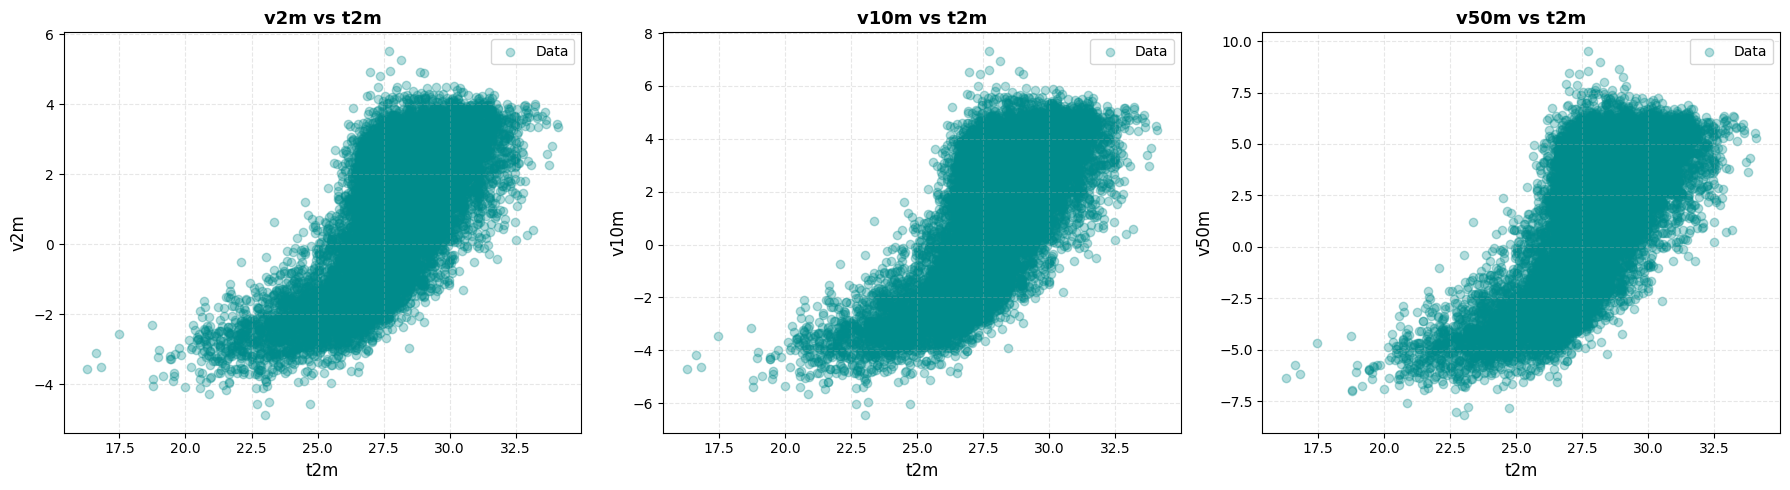

In [ ]:
# Scatter plot: v2m, v10m, v50m compare with t2m
features_to_compare = ['v2m', 'v10m', 'v50m']
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(features_to_compare):
    if 't2m' in df.columns and col in df.columns:
        X = df['t2m'].values
        y = df[col].values
        axs[i].scatter(X, y, alpha=0.3, label='Data', color='darkcyan')
        axs[i].set_xlabel('t2m', fontsize=12)
        axs[i].set_ylabel(col, fontsize=12)
        axs[i].set_title(f'{col} vs t2m', fontsize=13, fontweight='bold')
        axs[i].legend()
        axs[i].grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

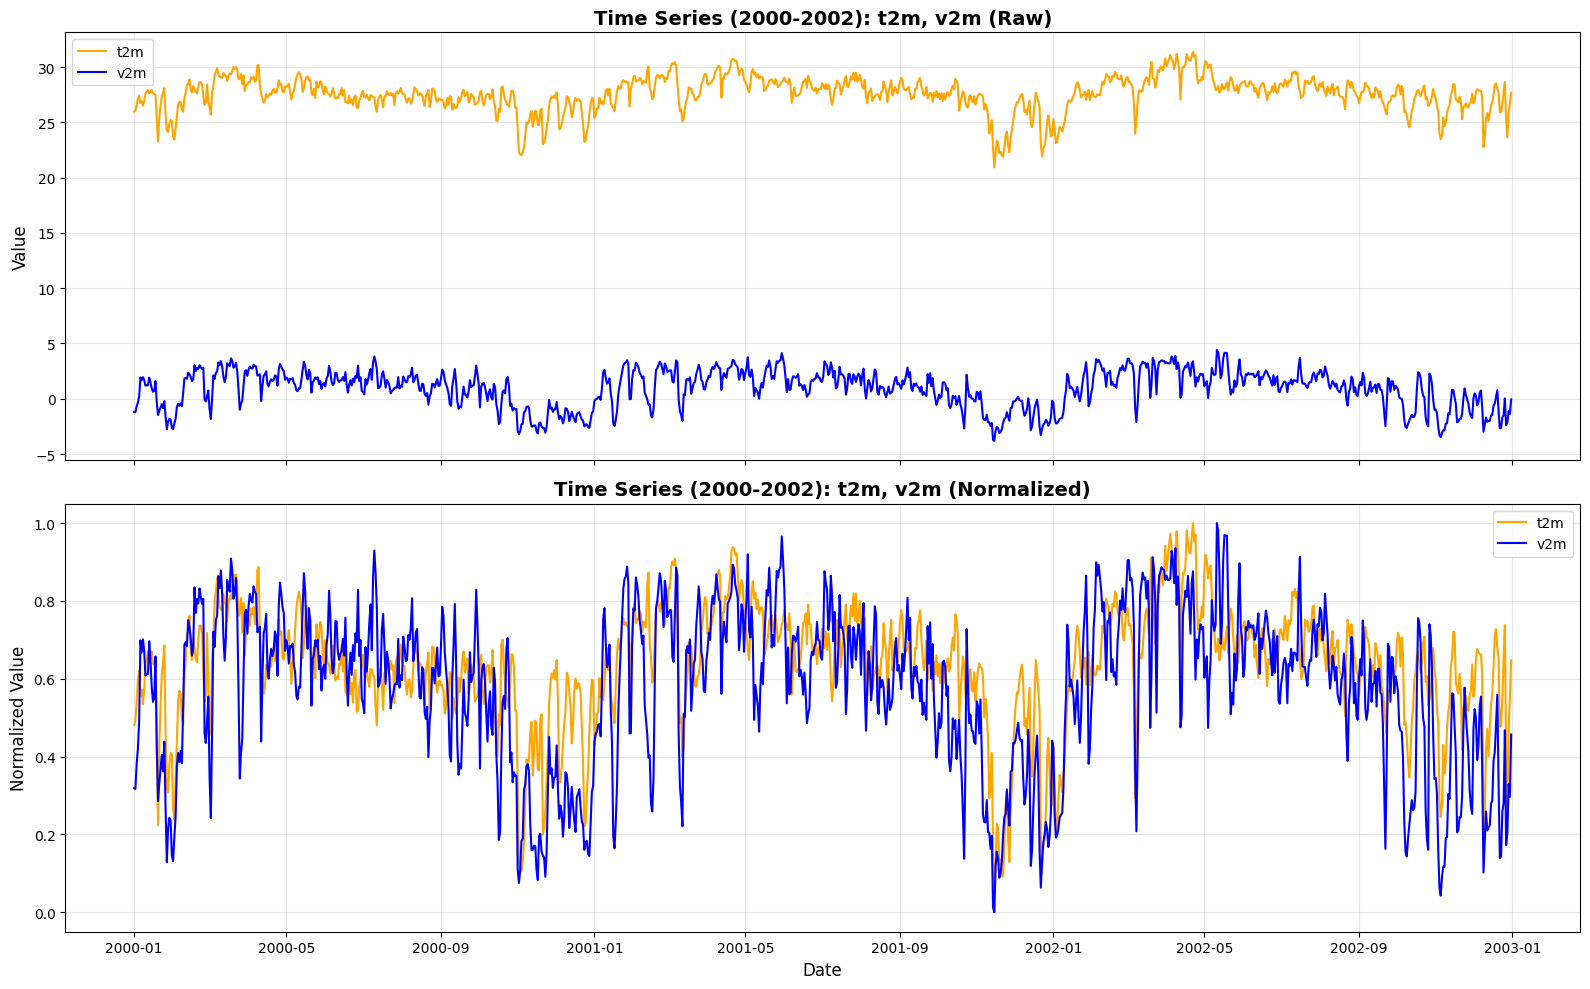

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(16, 10), sharex=True)
for col, color in zip(['t2m', 'v2m'], ['orange', 'blue']):
    if col in df_period.columns:
        axs[0].plot(df_period['date'], df_period[col], label=col, color=color, linewidth=1.5)
axs[0].set_ylabel('Value', fontsize=12)
axs[0].set_title('Time Series (2000-2002): t2m, v2m (Raw)', fontsize=14, fontweight='bold')
axs[0].legend(loc='best', fontsize=10)
axs[0].grid(True, alpha=0.3)

for col, color in zip(['t2m', 'v2m'], ['orange', 'blue']):
    if col in df_period.columns:
        norm_series = (df_period[col] - df_period[col].min()) / (df_period[col].max() - df_period[col].min())
        axs[1].plot(df_period['date'], norm_series, label=col, color=color, linewidth=1.5)
axs[1].set_ylabel('Normalized Value', fontsize=12)
axs[1].set_title('Time Series (2000-2002): t2m, v2m (Normalized)', fontsize=14, fontweight='bold')
axs[1].legend(loc='best', fontsize=10)
axs[1].grid(True, alpha=0.3)
axs[1].set_xlabel('Date', fontsize=12)
plt.tight_layout()
plt.show()

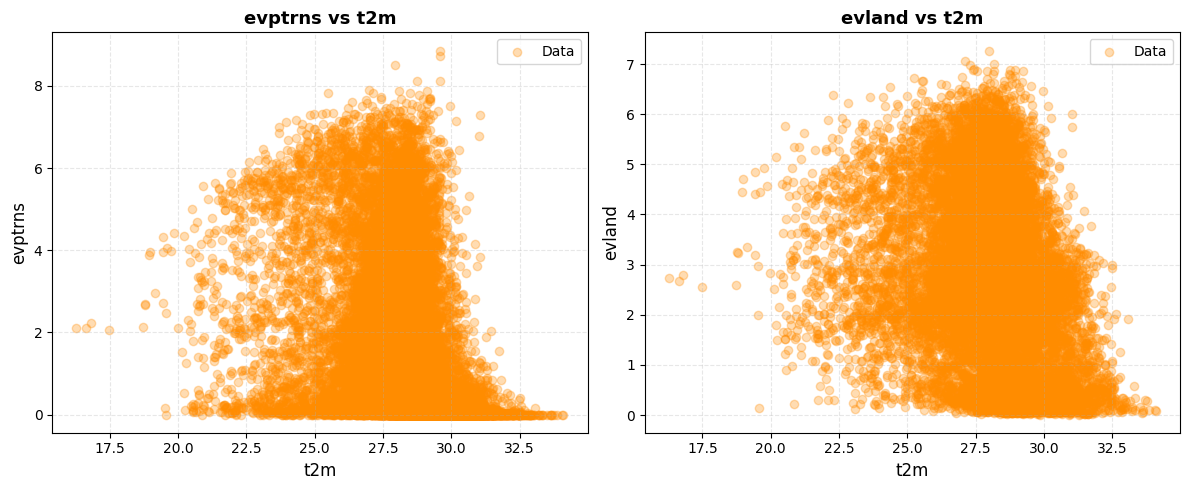

In [11]:
features_to_compare = ['evptrns', 'evland']
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
for i, col in enumerate(features_to_compare):
    if 't2m' in df.columns and col in df.columns:
        X = df['t2m'].values
        y = df[col].values
        axs[i].scatter(X, y, alpha=0.3, label='Data', color='darkorange')
        axs[i].set_xlabel('t2m', fontsize=12)
        axs[i].set_ylabel(col, fontsize=12)
        axs[i].set_title(f'{col} vs t2m', fontsize=13, fontweight='bold')
        axs[i].legend()
        axs[i].grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

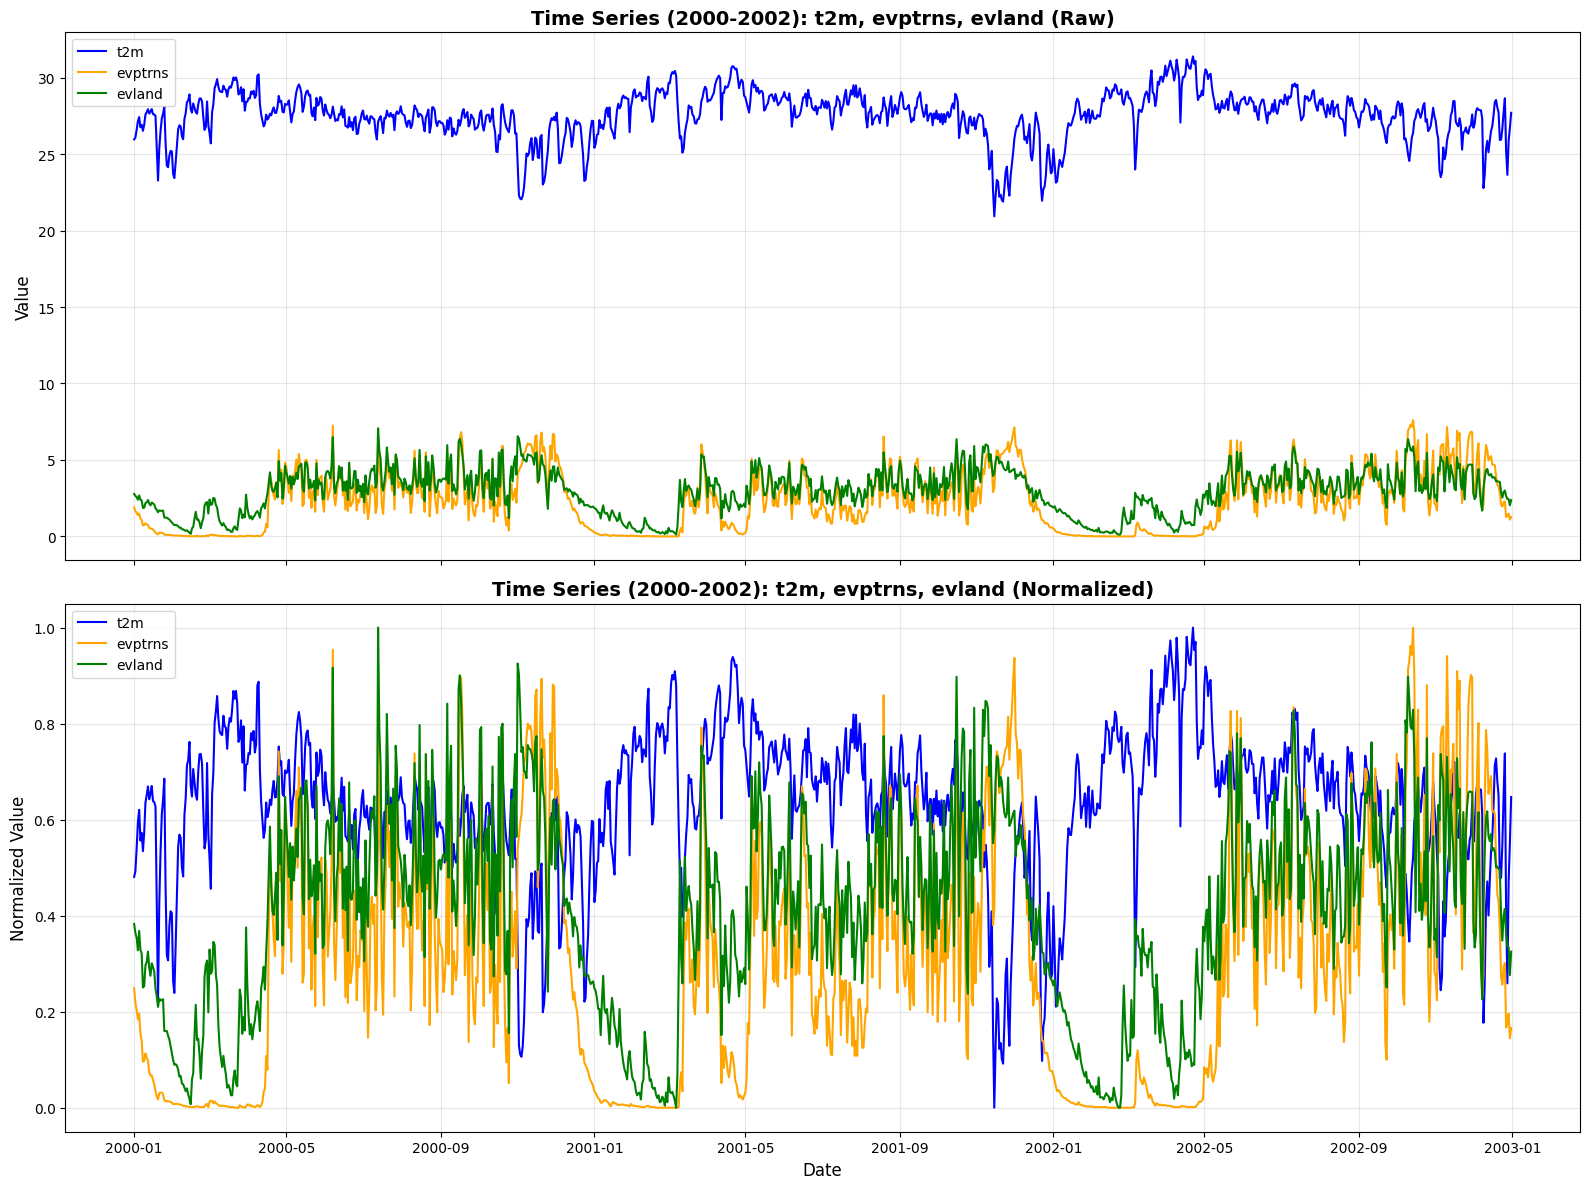

In [24]:
features = ['t2m', 'evptrns', 'evland']
labels = ['t2m', 'evptrns', 'evland']
colors = ['blue', 'orange', 'green']
fig, axs = plt.subplots(2, 1, figsize=(16, 12), sharex=True)
for feat, label, color in zip(features, labels, colors):
    if feat in df_period.columns:
        axs[0].plot(df_period['date'], df_period[feat], label=label, color=color, linewidth=1.5)
axs[0].set_ylabel('Value', fontsize=12)
axs[0].set_title('Time Series (2000-2002): t2m, evptrns, evland (Raw)', fontsize=14, fontweight='bold')
axs[0].legend(loc='best', fontsize=10)
axs[0].grid(True, alpha=0.3)

for feat, label, color in zip(features, labels, colors):
    if feat in df_period.columns:
        norm_series = (df_period[feat] - df_period[feat].min()) / (df_period[feat].max() - df_period[feat].min())
        axs[1].plot(df_period['date'], norm_series, label=label, color=color, linewidth=1.5)
axs[1].set_ylabel('Normalized Value', fontsize=12)
axs[1].set_title('Time Series (2000-2002): t2m, evptrns, evland (Normalized)', fontsize=14, fontweight='bold')
axs[1].legend(loc='best', fontsize=10)
axs[1].grid(True, alpha=0.3)
axs[1].set_xlabel('Date', fontsize=12)
plt.tight_layout()
plt.show()

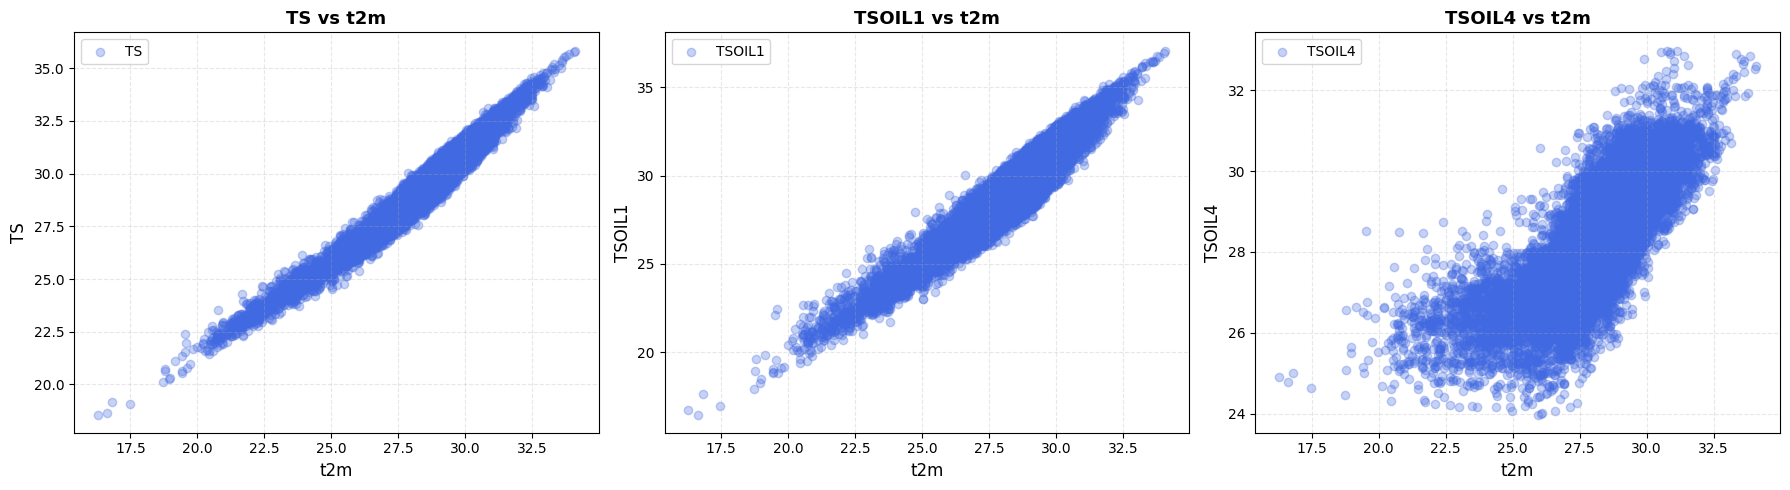

In [27]:
# Scatter plot: TS, TSOIL1, TSOIL4 เทียบกับ t2m
features_to_plot = ['ts', 'tsoil1', 'tsoil4']
labels = ['TS', 'TSOIL1', 'TSOIL4']
plt.figure(figsize=(18, 5))
for i, (feat, label) in enumerate(zip(features_to_plot, labels)):
    if feat in df.columns and 't2m' in df.columns:
        plt.subplot(1, 3, i+1)
        plt.scatter(df['t2m'], df[feat], alpha=0.3, color='royalblue', label=label)
        plt.xlabel('t2m', fontsize=12)
        plt.ylabel(label, fontsize=12)
        plt.title(f'{label} vs t2m', fontsize=13, fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

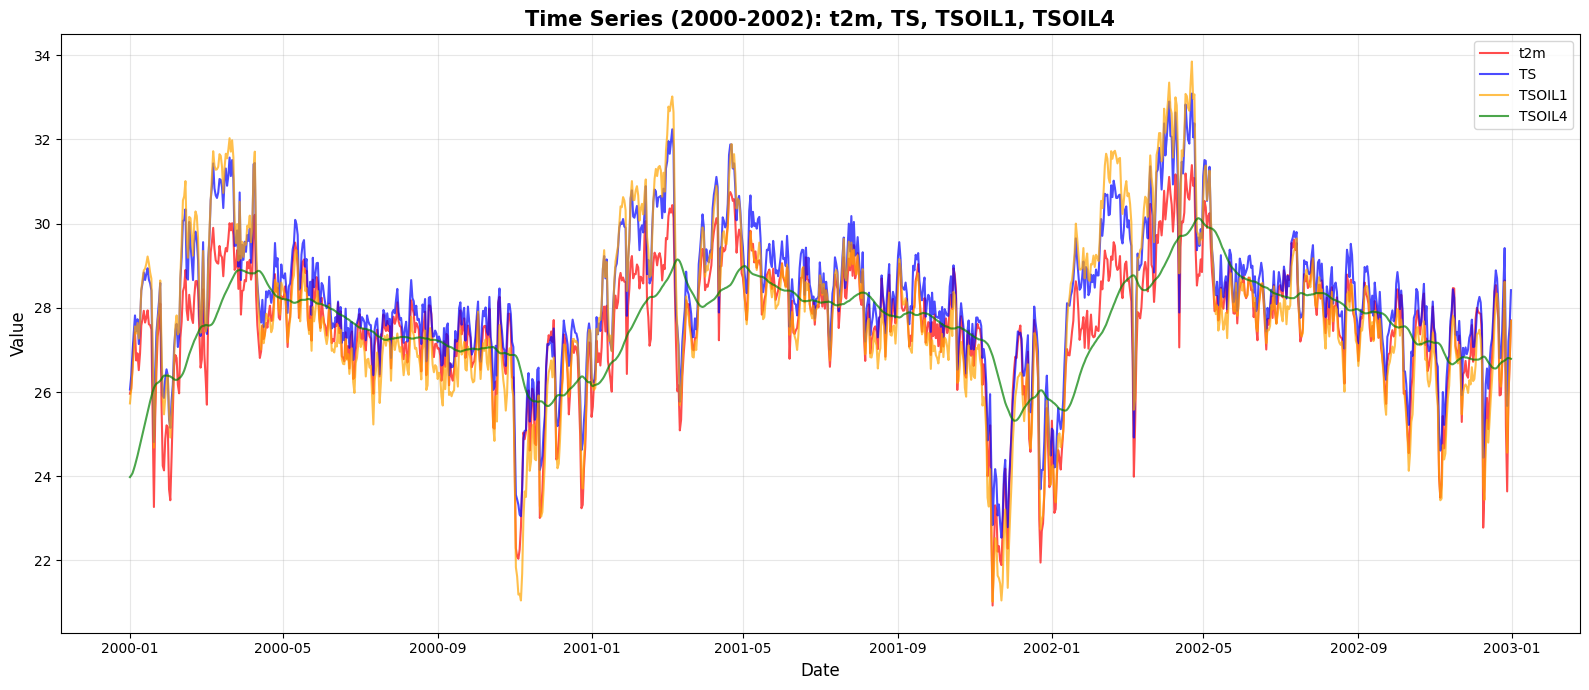

In [29]:
# Time series plot: t2m, TS, TSOIL1, TSOIL4 เฉพาะปี 2000-2002
features = ['t2m', 'ts', 'tsoil1', 'tsoil4']
labels = ['t2m', 'TS', 'TSOIL1', 'TSOIL4']
colors = ['red', 'blue', 'orange', 'green']
plt.figure(figsize=(16, 7))
for feat, label, color in zip(features, labels, colors):
    if feat in df_period.columns:
        plt.plot(df_period['date'], df_period[feat], label=label, color=color, linewidth=1.5, alpha=0.7)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('Time Series (2000-2002): t2m, TS, TSOIL1, TSOIL4', fontsize=15, fontweight='bold')
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()